# Bike Sharing Assignment

# The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands.

# The Solution is divided into the following steps:

-  Data Understanding and exploration
-  Data Visualisation
-  Data Preparation
-  Model building and evaluation

# Data Preparation:

• Load the data and understand it using dictionary provided.
• Convert the columns to proper data types.
• Create dummies for categorical variables.

Model building:
. divide the data in to train and test
. perform scaling
. divide the data into X and Y
. perform linear regression
. use the mixed appreach(RFE and manual)

Modeal evaluation:
. check the various assumptions
. check the R square  and adjusted R square
. Report the final model
    

# Step 1: Data Understanding and exploration

In [75]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [76]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [77]:
#Importing dataset

data = pd.read_csv(r'day.csv')

In [78]:
data.head() #look at the first 5 rows

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [79]:
data.tail()  #look at the last 5 rows

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

In [80]:
#check the columns of data
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [81]:
#check the shape
data.shape

(730, 16)

There are 730 rows and 16 columns in the data set.

In [82]:
#Checking the numerical columns data distribution statistics
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [83]:
#check dataframe for null and datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
# Checking for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 There are no null values in any of the columns

In [85]:
# Checking the null value percentage
data.isna().sum()/data.isna().count()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [86]:
# Checking for the duplicates
data.drop_duplicates(subset=None, inplace=True)
data.shape

(730, 16)

In [87]:
#check the size of data
data.size

11680

In [88]:
#check the datatypes of data
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [89]:
#check the axes of data
data.axes

[Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             720, 721, 722, 723, 724, 725, 726, 727, 728, 729],
            dtype='int64', length=730),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [90]:
#check the dimensions of data
data.ndim

2

In [91]:
#check the values of data
data.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

# Step 2 : Data Visualisation and  Data Preparation

. Separate numeric and categorical variables and visuvaliseing those variables
. Heare we are going to create the Target variable by droping some insignificant variables/ non_use variables
. Finding the outlires
. Finding duplicates
. Hear we are using univariate,Bivariate Analysis

####  separate numeric and categorical variables 

In [92]:
#numeric_data
data.select_dtypes(include=[np.number])

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1        0        6           0           2   
1          2       1   0     1        0        0           0           2   
2          3       1   0     1        0        1           1           1   
3          4       1   0     1        0        2           1           1   
4          5       1   0     1        0        3           1           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
725      726       1   1    12        0        4           1           2   
726      727       1   1    12        0        5           1           2   
727      728       1   1    12        0        6           0           2   
728      729       1   1    12        0        0           0           1   
729      730       1   1    12        0        1           1           2   

          temp     atemp      hum  windspeed  casual  registered   cnt  
0    14.110847  18.18125  80.5833  10.749882     331         654   985  
1    14.902598  17.68695  69.6087  16.652113     131         670   801  
2     8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3     8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4     9.305237  11.46350  43.6957  12.522300      82        1518  1600  
..         ...       ...      ...        ...     ...         ...   ...  
725  10.420847  11.33210  65.2917  23.458911     247        1867  2114  
726  10.386653  12.75230  59.0000  10.416557     644        2451  3095  
727  10.386653  12.12000  75.2917   8.333661     159        1182  1341  
728  10.489153  11.58500  48.3333  23.500518     364        1432  1796  
729   8.849153  11.17435  57.7500  10.374682     439        2290  2729  

[730 rows x 15 columns]

In [93]:
#categorical_data
data.select_dtypes(exclude=[np.number])

dteday
0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
..          ...
725  27-12-2019
726  28-12-2019
727  29-12-2019
728  30-12-2019
729  31-12-2019

[730 rows x 1 columns]

# Now comming to the  dropping columns that are irrelevant for the model 

. instant is just a row instance identifier.
. dteday is removed as we have some of date features like mnth and year and weekday already in other columns 
. And also for this analysis we will not consider day to day trend in demand for bikes.

In [94]:
#droping the columns
data.drop(['instant','dteday'],axis = 1,inplace = True)
data.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

## Finding out the  target variable

. casual and registered variables are not available at the time of prediction.
. And also these things will describe that the target variable is cnt in a very trivial way
. So target = casual + registered, which leads to data leakage.
. clearlly saying that sum of the both casual + registered is the target column/variable
. Also to avoid multicollinearity we delete the columns 'casual' and 'registered'

In [95]:
#droping the columns
data.drop(['casual'], axis = 1, inplace = True)
data.drop(['registered'], axis = 1, inplace = True)

In [96]:
#Inspect data frame after dropping some columns
data.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [98]:
data.shape

(730, 12)

# Finding out the outliers

. For outliers we can draw box plots for indepent variables with continuous values

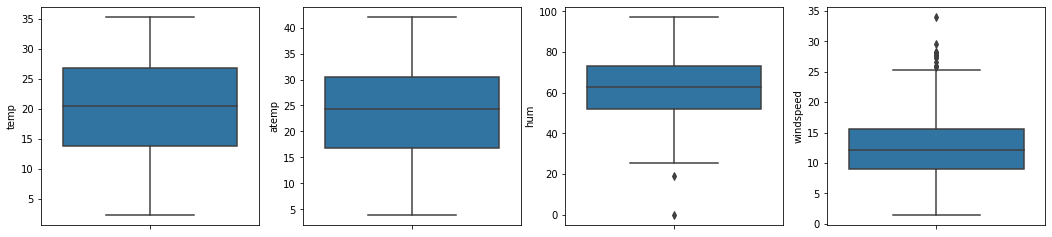

In [99]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

Inferencess:
By looking at the plots clearlly we can notice there are no outliers.

# Converting some numeric data  to categorical data

In [100]:
#season
data.season = data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [101]:
#Checking whether the conversion is done properly or not 
data['season'].astype('category').value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [102]:
#weathersit
data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [103]:
#Checking whether the conversion is done properly or not 
data['weathersit'].astype('category').value_counts()

good        463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [104]:
#mnth
data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

In [105]:
#Checking whether the conversion is done properly or not 
data['mnth'].astype('category').value_counts()

aug     62
dec     62
jan     62
jul     62
mar     62
may     62
oct     62
apr     60
jun     60
nov     60
sept    60
feb     56
Name: mnth, dtype: int64

In [106]:
#weekday
data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)

In [107]:
#Checking whether the conversion is done properly or not 
data['weekday'].astype('category').value_counts()

mon    105
sat    105
sun    105
fri    104
thu    104
tue    104
wed    103
Name: weekday, dtype: int64

In [108]:
# Check the dataframe again
data.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0  jan        0     sat           0   moderate  14.110847   
1  Spring   0  jan        0     sun           0   moderate  14.902598   
2  Spring   0  jan        0     mon           1       good   8.050924   
3  Spring   0  jan        0     tue           1       good   8.200000   
4  Spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [109]:
# Checking again shape of a dataframe
data.shape

(730, 12)

# Visualising Numeric Variables


<Figure size 1080x2160 with 0 Axes>

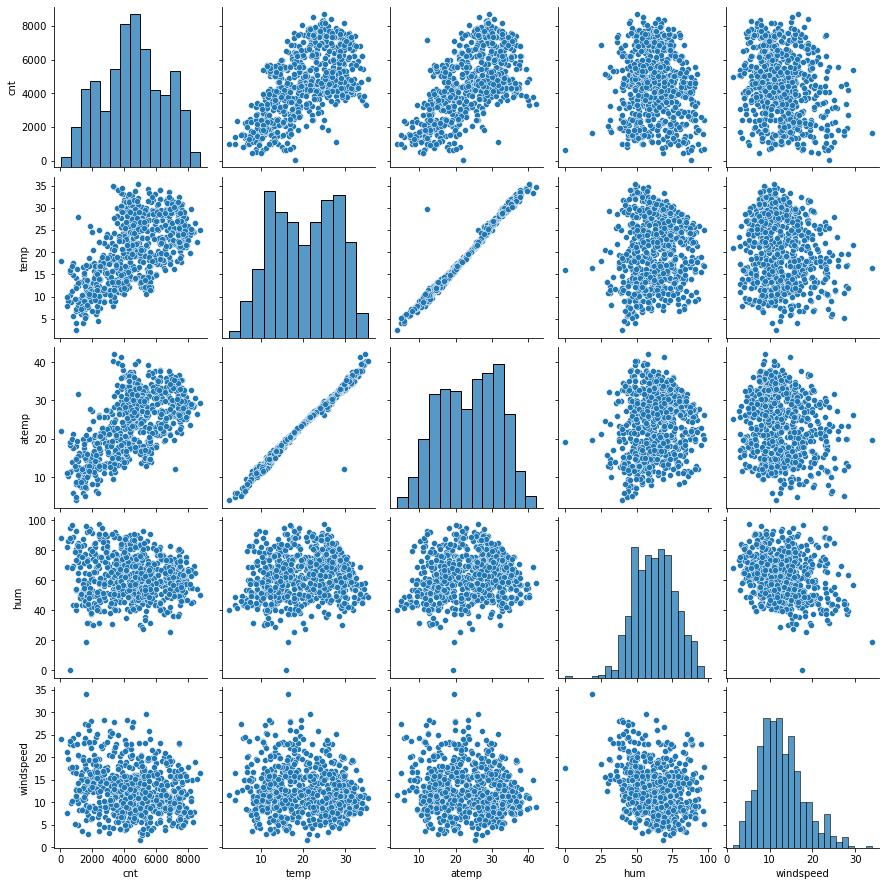

In [110]:
#Now make a pairplot of all the numeric variables
plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Inferencess:
. Looks like the temp and atemp has the highest corelation with the target variable cnt
. temp and atemp are highly co-related with each other

# Visualising Categorical Variables

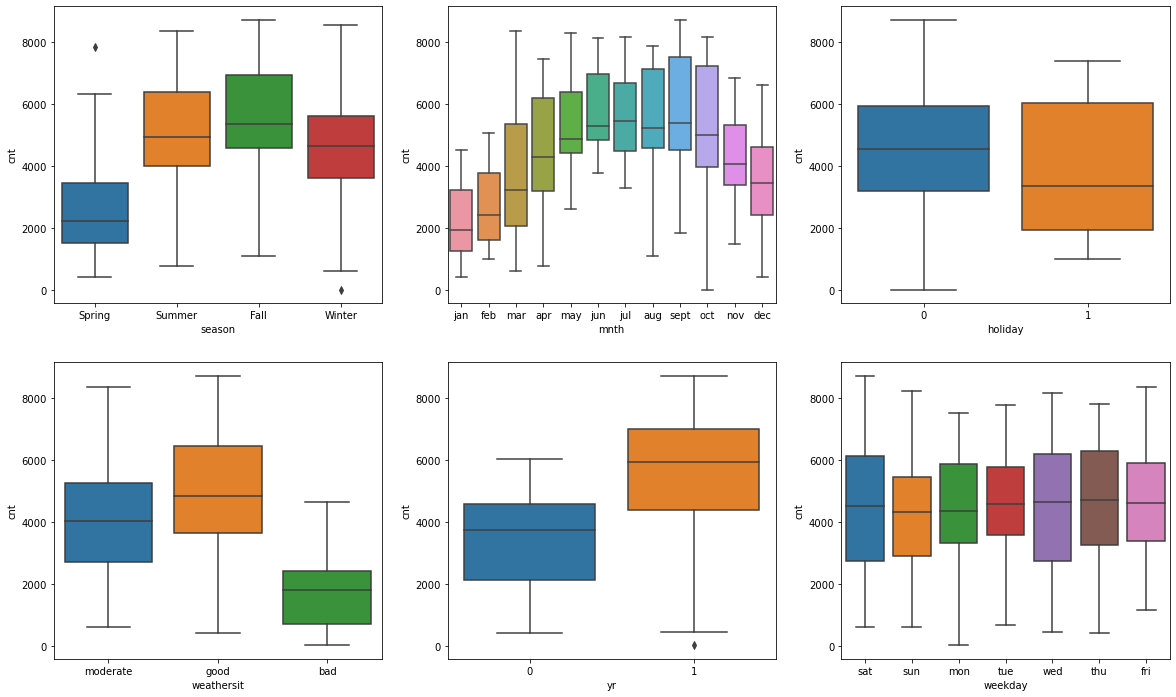

In [111]:
# Now make a boxplots for categorical variables
#In the x axis we are using categorical variables and in the y axis we are using the cnt(target) variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

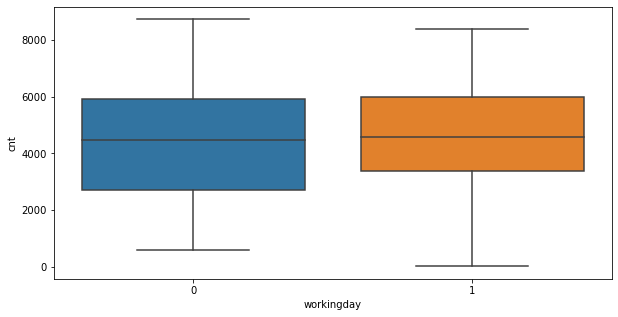

In [112]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()

Inferencess:
. The count of bike sharing is least for spring
. The number of bike shares incresed in 2019
. The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
. The cnt values increases in summer months
. The cnt values are less during holidays
. On workingday the cnt is almost same for both

# creating dummy variables for the  categorical variables(season , mnth ,weathersit ,weekday)

In [113]:
#Creating dummy variables
dummy = data[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True)

### adding dummy variables to original dataset

In [114]:
data = pd.concat([dummy,data],axis = 1)

In [115]:
# Now we can see again the head of our dataframe.
data.head()

season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  mnth_feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  mnth  holiday  weekday  \
0         1         0         0         0  ...   jan        0      sat   
1         1         0         0         0  ...   jan        0      sun   
2         1         0         0         0  ...   jan        0      mon   
3         1         0         0         0  ...   jan        0      tue   
4         1         0         0         0  ...   jan        0      wed   

   workingday  weathersit       temp     atemp      hum  windspeed   cnt  
0           0    moderate  14.110847  18.18125  80.5833  10.749882   985  
1           0    moderate  14.902598  17.68695  69.6087  16.652113   801  
2           1        good   8.050924   9.47025  43.7273  16.636703  1349  
3           1        good   8.200000  10.60610  59.0435  10.739832  1562  
4           1        good   9.305237  11.46350  43.6957  12.522300  1600  

[5 rows x 34 columns]

In [116]:
# Checking again shape of a dataframe
data.shape

(730, 34)

### Hear we are using univariate,Bivariate Analysis  for the numerical and categorical variables

Visualising the Dataframe to Find the Correlation between the Numerical Variable

<Figure size 1440x1080 with 0 Axes>

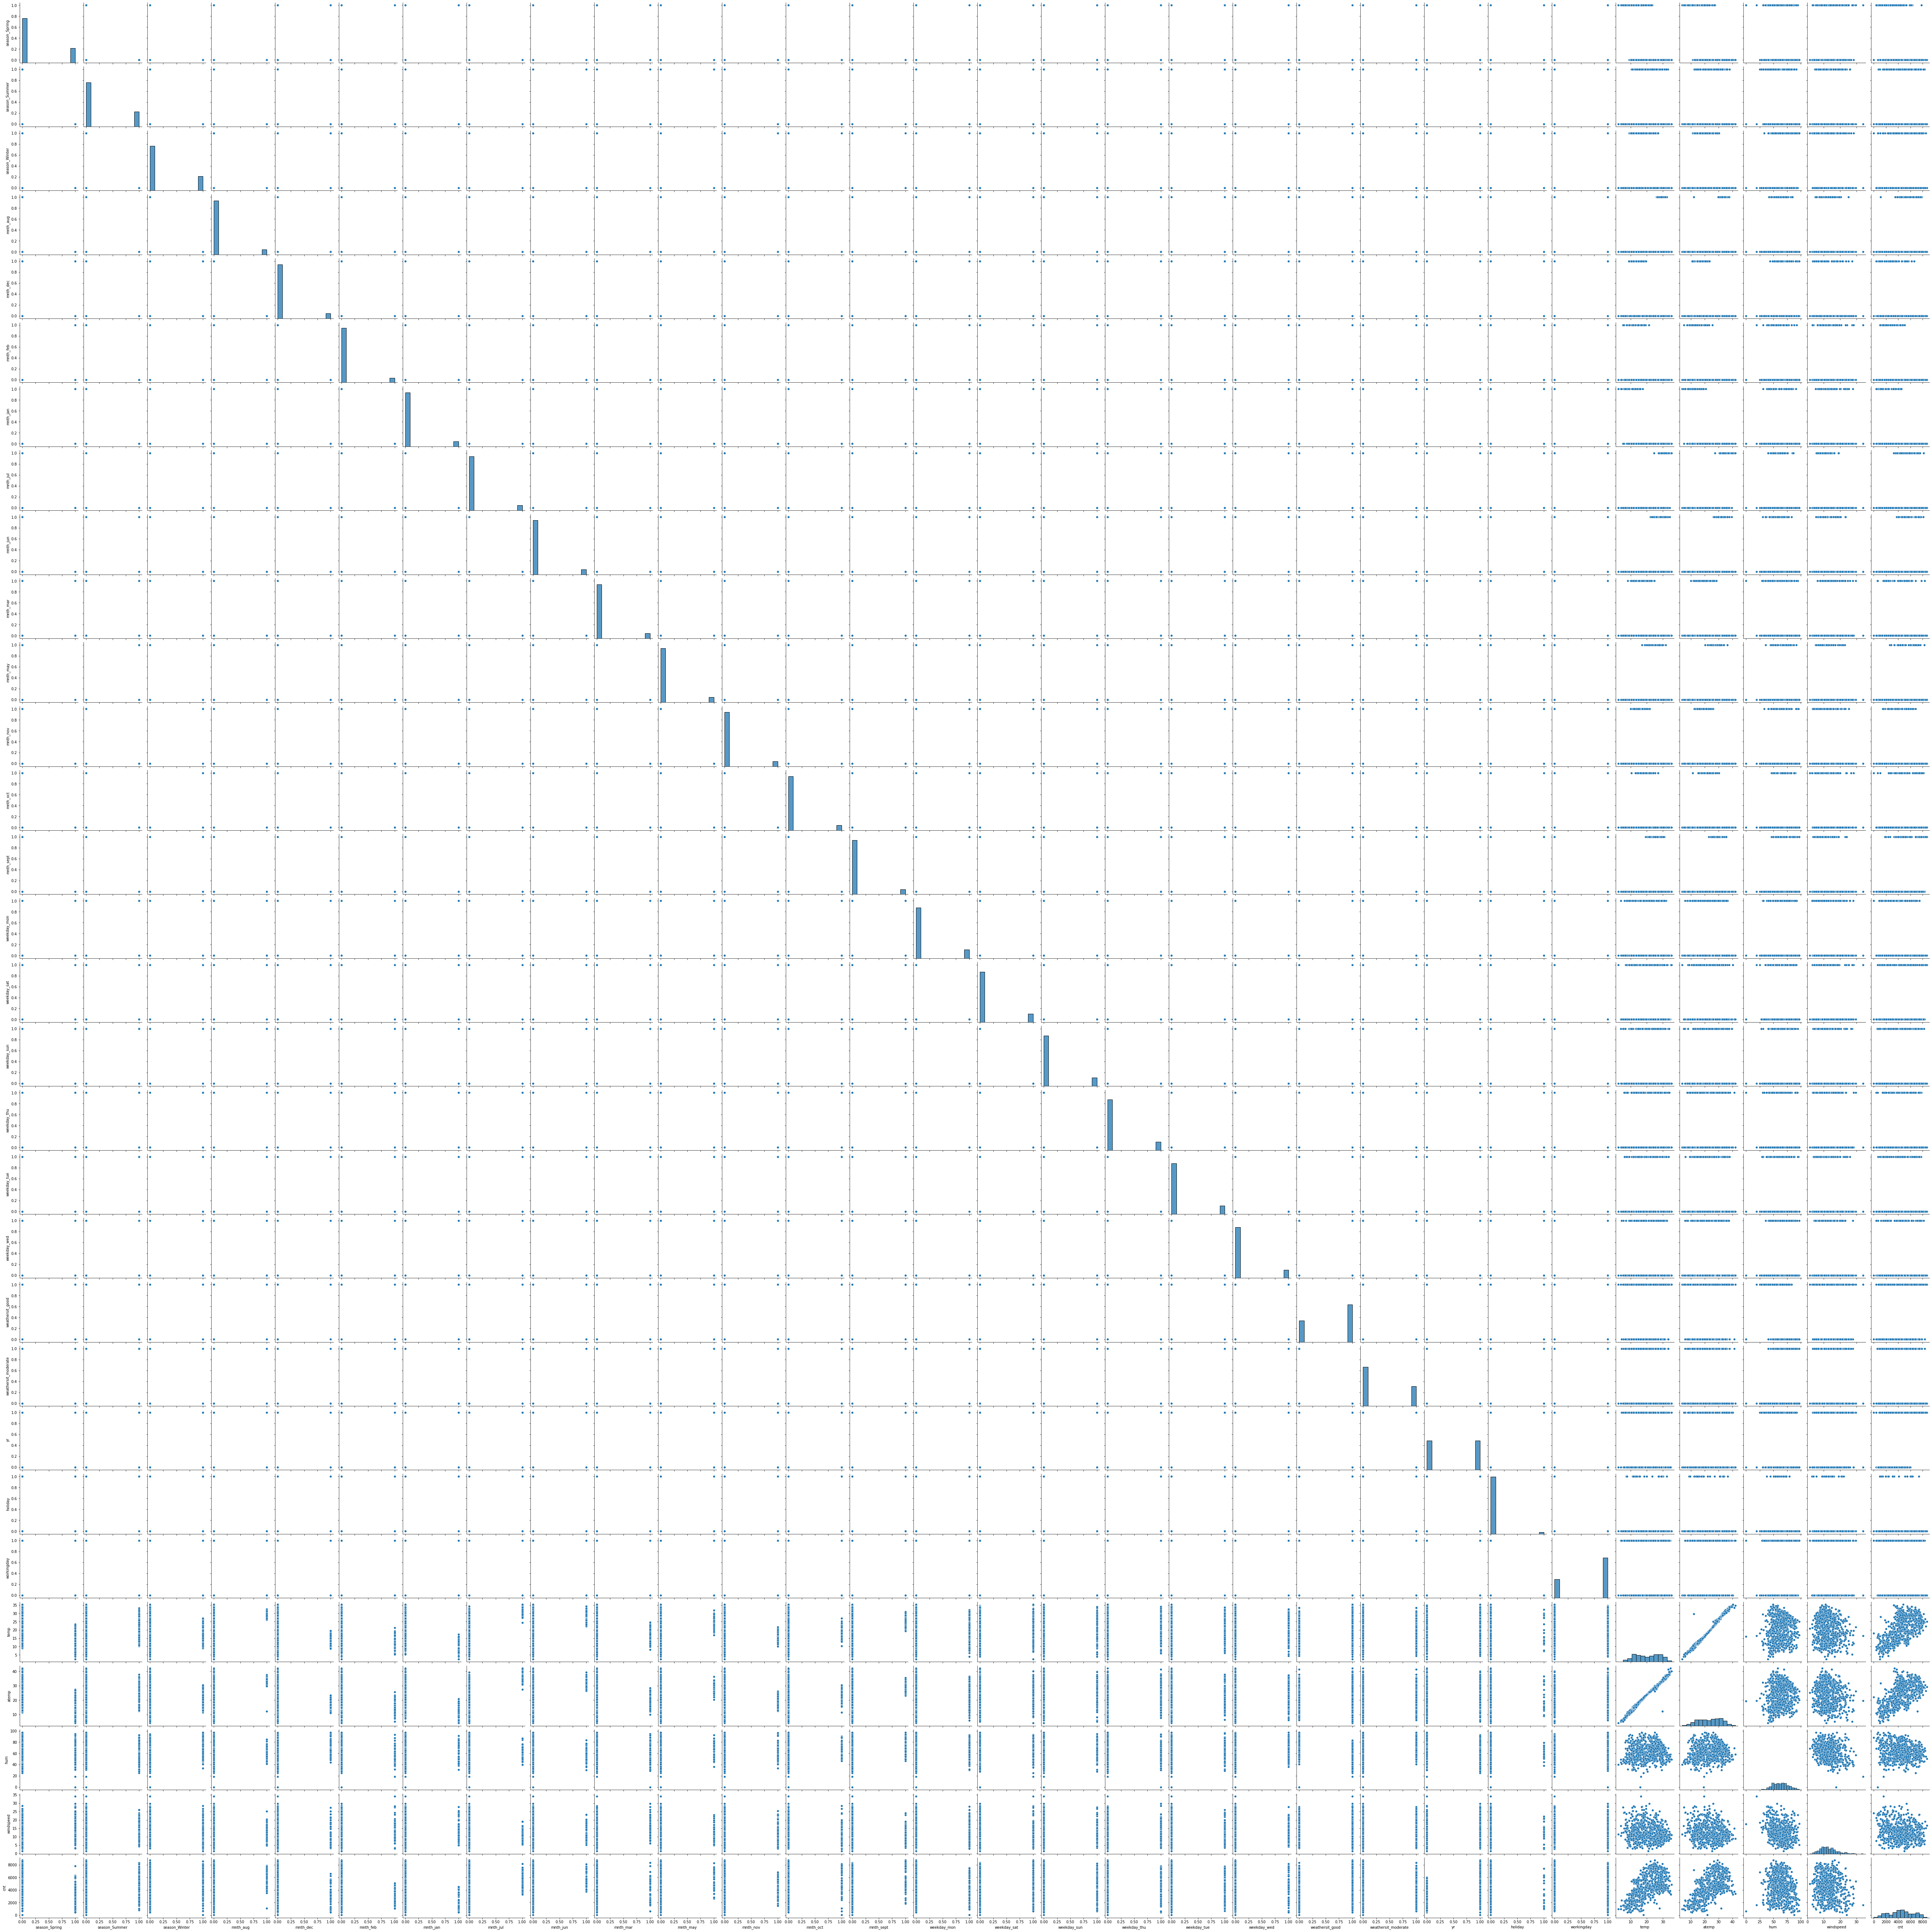

In [53]:
plt.figure(figsize=(20,15))
sns.pairplot(data)
plt.show()

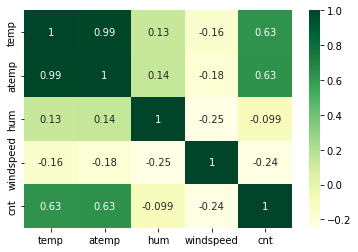

In [117]:
# Checking continuous variables Correlation relationship with each other
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGn', annot = True)
plt.show()

Inferencess:
Here we see that temp and atemp has correlation 0.99,that means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here 

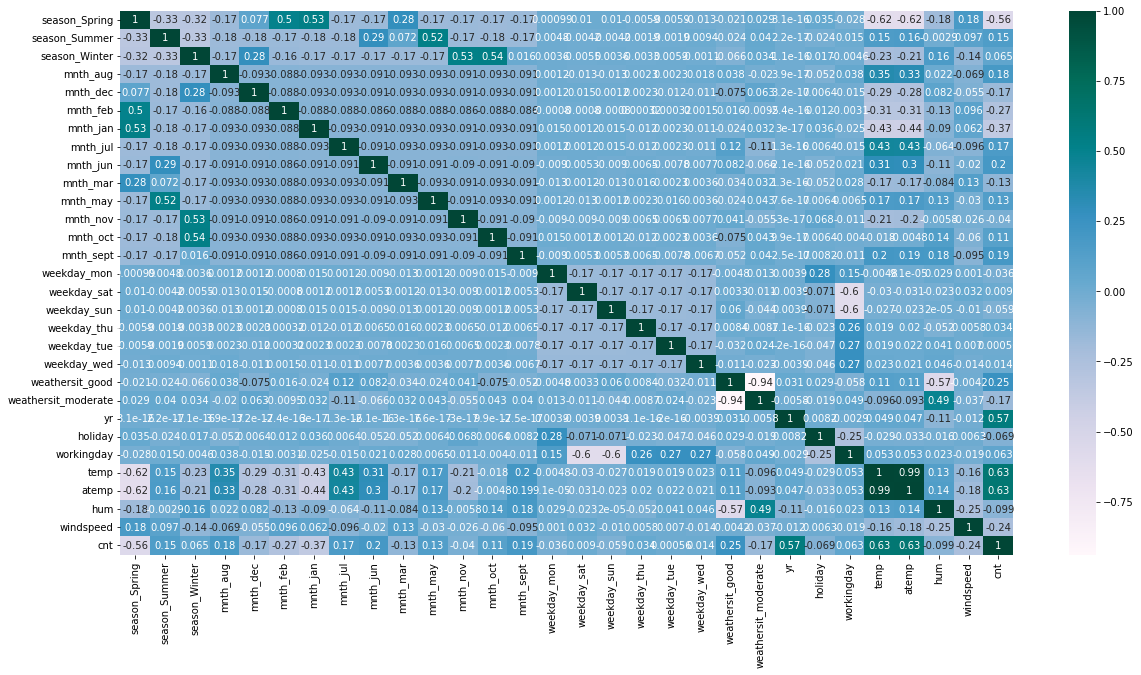

In [118]:
#Correlations for numeric variables
plt.figure(figsize = (20, 10))
cor=data.corr()
sns.heatmap(cor, cmap="PuBuGn", annot = True)
plt.show()

Inferencess:
. From the correlation map, season_winter and mnth_oct seems to be highly correlated with 0.54 and only should variable can be considered for the model.
. However let us elminate it based on the Variance Inflation Factor later during the model building.
. We also see Target variable has a linear relationship with some of the indeptendent variables. 
so that we can drop the atemp variable
.temp variable also highlly corelated with target variable with 0.63

In [119]:
#Bivariate Analysis

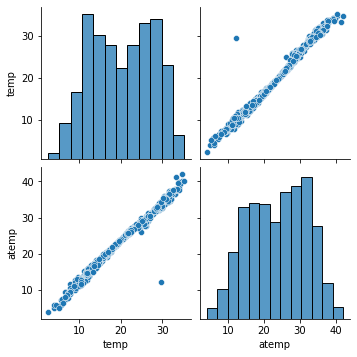

In [120]:
sns.pairplot(data[['temp','atemp']])
plt.show()

Inferencess :
. Predictor columns temp and atemp are very much correlated to each other,
. so we can drop any one of them, here we are dropping atemp variable

In [121]:
#Droping the atemp variable:
data.drop(['atemp'],axis=1,inplace=True)

In [122]:
# check the dataframe again
data.head()

season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  mnth_feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  yr  mnth  holiday  weekday  \
0         1         0         0         0  ...   0   jan        0      sat   
1         1         0         0         0  ...   0   jan        0      sun   
2         1         0         0         0  ...   0   jan        0      mon   
3         1         0         0         0  ...   0   jan        0      tue   
4         1         0         0         0  ...   0   jan        0      wed   

   workingday  weathersit       temp      hum  windspeed   cnt  
0           0    moderate  14.110847  80.5833  10.749882   985  
1           0    moderate  14.902598  69.6087  16.652113   801  
2           1        good   8.050924  43.7273  16.636703  1349  
3           1        good   8.200000  59.0435  10.739832  1562  
4           1        good   9.305237  43.6957  12.522300  1600  

[5 rows x 33 columns]

In [123]:
#Checking the dataframe again
data.shape

(730, 33)

In [124]:
#univariate Analysis

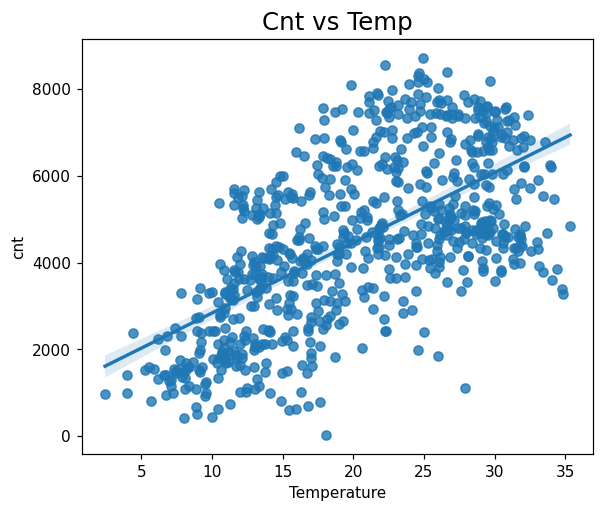

In [125]:
# univariate Analysis for Cnt vs Temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=data,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Inferencess:
. Demand for bikes is positively correlated to temp.
. We can see that cnt is linearly increasing with temp indicating linear relation.

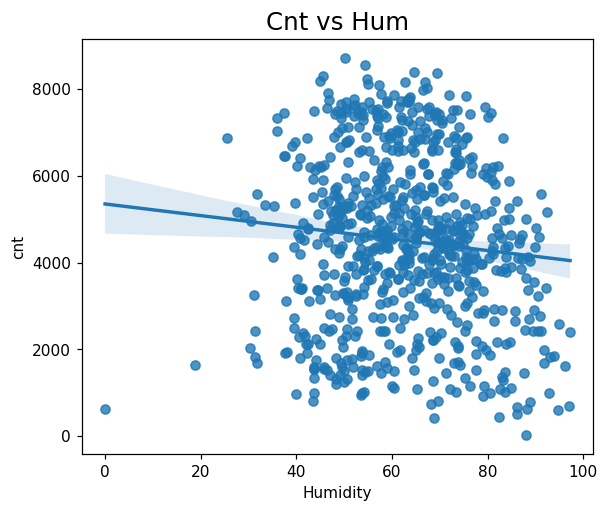

In [126]:
# univariate Analysis for Cnt vs Hum
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=data,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Inferencess:
. Hum is values are more scattered around.
. Although we can see cnt decreasing with increase in humidity.

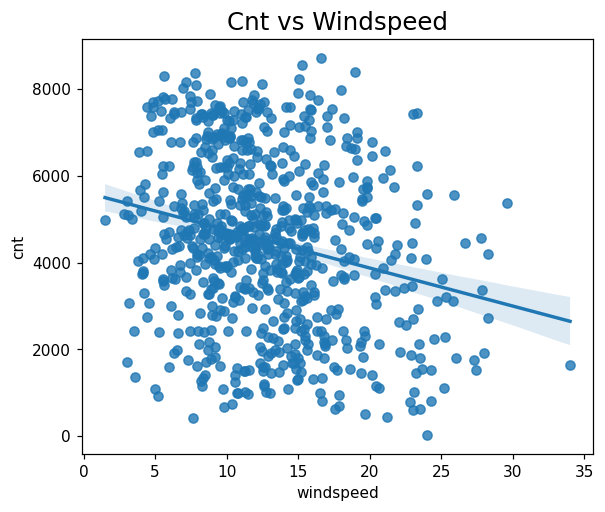

In [127]:
# univariate Analysis for Cnt vs Windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=data,y="cnt",x="windspeed")
plt.show()

Inferencess:
. Windspeed values are more scattered around.
. Although we can see cnt decreasing with increase in windspeed.

In [128]:
##now we can drop some variables with same meaning and checking for shape
data.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
data.shape

(730, 29)

# Model building:
. divide the data in to train and test
. perform scaling
. divide the data into X and Y
. perform linear regression
. use the mixed appreach(RFE and manual)

### divide the data in to train and test

In [129]:
data.shape

(730, 29)

In [130]:
#using train_test_split we are dividing the daraset inti train and test
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [131]:
#checking shape of train and test dataframes
print("Train dataframe : ",data_train.shape)
print("Test dataframe : ",data_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


In [132]:
# Train data set first 5 rows
data_train.head()

season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  \
653              0              0              1         0         0   
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         0         1   
482              0              1              0         0         0   

     mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  weekday_wed  \
653         0         0         0         0         0  ...            0   
576         0         0         1         0         0  ...            0   
426         0         0         0         0         1  ...            0   
728         0         0         0         0         0  ...            0   
482         0         0         0         0         0  ...            0   

     weathersit_good  weathersit_moderate  yr  holiday  workingday       temp  \
653                1                    0   1        0           1  19.201653   
576                1                    0   1        0           1  29.246653   
426                0                    1   1        0           0  16.980847   
728                1                    0   1        0           0  10.489153   
482                0                    1   1        0           0  15.443347   

         hum  windspeed   cnt  
653  55.8333  12.208807  7534  
576  70.4167  11.083475  7216  
426  62.1250  10.792293  4066  
728  48.3333  23.500518  1796  
482  48.9583   8.708325  4220  

[5 rows x 29 columns]

In [133]:
# Train data set shape
data_train.shape

(510, 29)

In [134]:
# Train data set statistical values
data_train.describe()

season_Spring  season_Summer  season_Winter    mnth_aug    mnth_dec  \
count     510.000000     510.000000      510.00000  510.000000  510.000000   
mean        0.243137       0.245098        0.24902    0.096078    0.084314   
std         0.429398       0.430568        0.43287    0.294988    0.278131   
min         0.000000       0.000000        0.00000    0.000000    0.000000   
25%         0.000000       0.000000        0.00000    0.000000    0.000000   
50%         0.000000       0.000000        0.00000    0.000000    0.000000   
75%         0.000000       0.000000        0.00000    0.000000    0.000000   
max         1.000000       1.000000        1.00000    1.000000    1.000000   

         mnth_feb    mnth_jan    mnth_jul    mnth_jun    mnth_mar  ...  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  ...   
mean     0.066667    0.088235    0.076471    0.074510    0.098039  ...   
std      0.249689    0.283915    0.266010    0.262857    0.297660  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       weekday_wed  weathersit_good  weathersit_moderate          yr  \
count   510.000000       510.000000           510.000000  510.000000   
mean      0.158824         0.627451             0.343137    0.507843   
std       0.365870         0.483958             0.475223    0.500429   
min       0.000000         0.000000             0.000000    0.000000   
25%       0.000000         0.000000             0.000000    0.000000   
50%       0.000000         1.000000             0.000000    1.000000   
75%       0.000000         1.000000             1.000000    1.000000   
max       1.000000         1.000000             1.000000    1.000000   

          holiday  workingday        temp         hum   windspeed          cnt  
count  510.000000  510.000000  510.000000  510.000000  510.000000   510.000000  
mean     0.025490    0.676471   20.102429   63.112926   12.831318  4486.382353  
std      0.157763    0.468282    7.431169   14.156632    5.291832  1952.158739  
min      0.000000    0.000000    2.424346    0.000000    2.834381    22.000000  
25%      0.000000    0.000000   13.606865   52.270825    9.041918  3120.000000  
50%      0.000000    1.000000   20.209597   63.437500   12.083182  4530.000000  
75%      0.000000    1.000000   26.615847   73.250025   15.750879  5973.500000  
max      1.000000    1.000000   35.328347   97.041700   34.000021  8714.000000  

[8 rows x 29 columns]

In [135]:
# Test data set shape
data_test.shape

(219, 29)

In [136]:
## Test data set statistical values
data_test.describe()

season_Spring  season_Summer  season_Winter    mnth_aug    mnth_dec  \
count     219.000000     219.000000     219.000000  219.000000  219.000000   
mean        0.255708       0.264840       0.232877    0.059361    0.086758   
std         0.437258       0.442259       0.423633    0.236840    0.282125   
min         0.000000       0.000000       0.000000    0.000000    0.000000   
25%         0.000000       0.000000       0.000000    0.000000    0.000000   
50%         0.000000       0.000000       0.000000    0.000000    0.000000   
75%         1.000000       1.000000       0.000000    0.000000    0.000000   
max         1.000000       1.000000       1.000000    1.000000    1.000000   

         mnth_feb    mnth_jan    mnth_jul    mnth_jun    mnth_mar  ...  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  ...   
mean     0.100457    0.077626    0.105023    0.095890    0.054795  ...   
std      0.301297    0.268194    0.307285    0.295115    0.228100  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       weekday_wed  weathersit_good  weathersit_moderate          yr  \
count   219.000000       219.000000           219.000000  219.000000   
mean      0.100457         0.652968             0.319635    0.479452   
std       0.301297         0.477117             0.467403    0.500722   
min       0.000000         0.000000             0.000000    0.000000   
25%       0.000000         0.000000             0.000000    0.000000   
50%       0.000000         1.000000             0.000000    0.000000   
75%       0.000000         1.000000             1.000000    1.000000   
max       1.000000         1.000000             1.000000    1.000000   

          holiday  workingday        temp         hum   windspeed          cnt  
count  219.000000  219.000000  219.000000  219.000000  219.000000   219.000000  
mean     0.036530    0.698630   20.815737   61.961883   12.600130  4546.981735  
std      0.188034    0.459904    7.689600   14.456669    4.984858  1898.633630  
min      0.000000    0.000000    3.957390   25.416700    1.500244   441.000000  
25%      0.000000    0.000000   14.093750   51.166700    9.021282  3303.500000  
50%      0.000000    1.000000   20.807500   60.916700   12.167200  4579.000000  
75%      0.000000    1.000000   27.401653   72.192050   15.395629  5869.500000  
max      1.000000    1.000000   34.815847   97.250000   27.999836  8395.000000  

[8 rows x 29 columns]

In [137]:
## Train data set first 5 rows
data_test.head()

season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  \
184              0              0              0         0         0   
535              0              1              0         0         0   
299              0              0              1         0         0   
221              0              0              0         1         0   
152              0              1              0         0         0   

     mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  weekday_wed  \
184         0         0         1         0         0  ...            0   
535         0         0         0         1         0  ...            1   
299         0         0         0         0         0  ...            0   
221         0         0         0         0         0  ...            1   
152         0         0         0         1         0  ...            0   

     weathersit_good  weathersit_moderate  yr  holiday  workingday       temp  \
184                0                    1   0        1           0  29.793347   
535                1                    0   1        0           1  32.082500   
299                0                    1   0        0           1  19.270000   
221                1                    0   0        0           1  31.433347   
152                1                    0   0        0           1  29.315000   

         hum  windspeed   cnt  
184  63.7917   5.459106  6043  
535  59.2083   7.625404  6211  
299  81.2917  13.250121  2659  
221  42.4167  13.417286  4780  
152  30.5000  19.583229  4968  

[5 rows x 29 columns]

# perform scaling

In [138]:
#Use Normalized scaler to scale
scaler = MinMaxScaler()

#### perform scaling on train set

hear am not using cnt variable because it is a target variable

In [139]:
#We can apply scaller to all columns except dummy variables and target variable
scale_columns=['temp','hum','windspeed']
data_train[scale_columns] = scaler.fit_transform(data_train[scale_columns])

In [140]:
# again checking for values are changed or not
data_train.head()

season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  \
653              0              0              1         0         0   
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         0         1   
482              0              1              0         0         0   

     mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  weekday_wed  \
653         0         0         0         0         0  ...            0   
576         0         0         1         0         0  ...            0   
426         0         0         0         0         1  ...            0   
728         0         0         0         0         0  ...            0   
482         0         0         0         0         0  ...            0   

     weathersit_good  weathersit_moderate  yr  holiday  workingday      temp  \
653                1                    0   1        0           1  0.509887   
576                1                    0   1        0           1  0.815169   
426                0                    1   1        0           0  0.442393   
728                1                    0   1        0           0  0.245101   
482                0                    1   1        0           0  0.395666   

          hum  windspeed   cnt  
653  0.575354   0.300794  7534  
576  0.725633   0.264686  7216  
426  0.640189   0.255342  4066  
728  0.498067   0.663106  1796  
482  0.504508   0.188475  4220  

[5 rows x 29 columns]

In [141]:
## checking data set statistical values after scaling
data_train.describe()

season_Spring  season_Summer  season_Winter    mnth_aug    mnth_dec  \
count     510.000000     510.000000      510.00000  510.000000  510.000000   
mean        0.243137       0.245098        0.24902    0.096078    0.084314   
std         0.429398       0.430568        0.43287    0.294988    0.278131   
min         0.000000       0.000000        0.00000    0.000000    0.000000   
25%         0.000000       0.000000        0.00000    0.000000    0.000000   
50%         0.000000       0.000000        0.00000    0.000000    0.000000   
75%         0.000000       0.000000        0.00000    0.000000    0.000000   
max         1.000000       1.000000        1.00000    1.000000    1.000000   

         mnth_feb    mnth_jan    mnth_jul    mnth_jun    mnth_mar  ...  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  ...   
mean     0.066667    0.088235    0.076471    0.074510    0.098039  ...   
std      0.249689    0.283915    0.266010    0.262857    0.297660  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       weekday_wed  weathersit_good  weathersit_moderate          yr  \
count   510.000000       510.000000           510.000000  510.000000   
mean      0.158824         0.627451             0.343137    0.507843   
std       0.365870         0.483958             0.475223    0.500429   
min       0.000000         0.000000             0.000000    0.000000   
25%       0.000000         0.000000             0.000000    0.000000   
50%       0.000000         1.000000             0.000000    1.000000   
75%       0.000000         1.000000             1.000000    1.000000   
max       1.000000         1.000000             1.000000    1.000000   

          holiday  workingday        temp         hum   windspeed          cnt  
count  510.000000  510.000000  510.000000  510.000000  510.000000   510.000000  
mean     0.025490    0.676471    0.537262    0.650369    0.320768  4486.382353  
std      0.157763    0.468282    0.225844    0.145882    0.169797  1952.158739  
min      0.000000    0.000000    0.000000    0.000000    0.000000    22.000000  
25%      0.000000    0.000000    0.339853    0.538643    0.199179  3120.000000  
50%      0.000000    1.000000    0.540519    0.653714    0.296763  4530.000000  
75%      0.000000    1.000000    0.735215    0.754830    0.414447  5973.500000  
max      1.000000    1.000000    1.000000    1.000000    1.000000  8714.000000  

[8 rows x 29 columns]

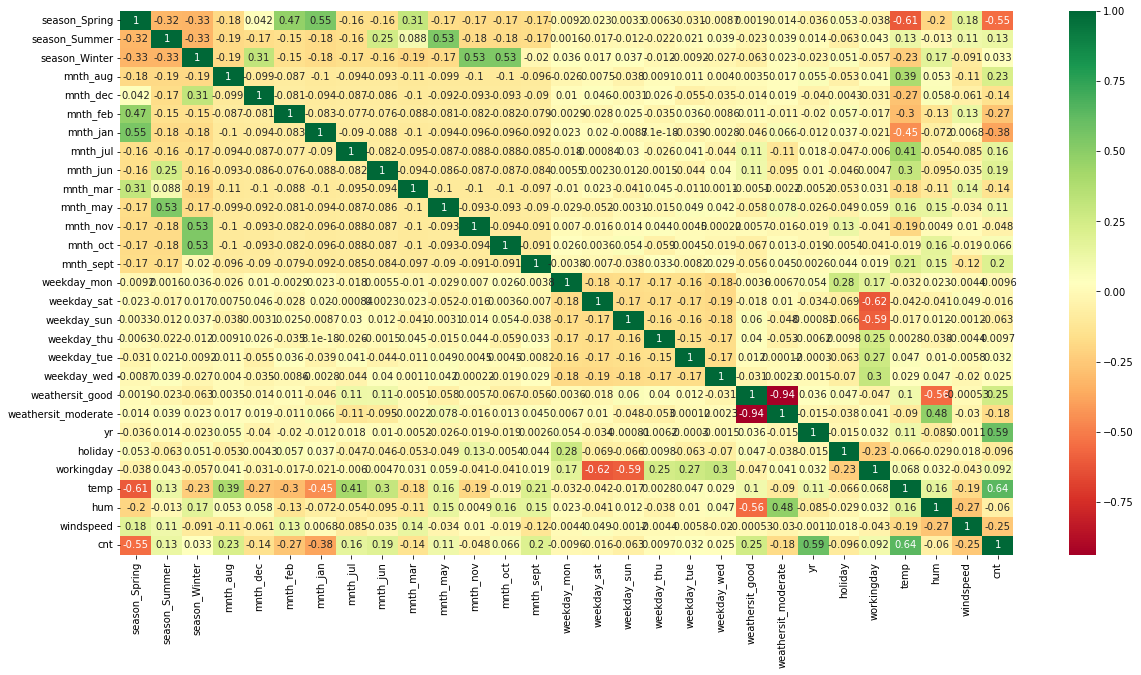

In [142]:
# Let's check the correlation coefficients to see which variables are highly correlated for the train set
plt.figure(figsize = (20, 10))
sns.heatmap(data_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

Inferencess:
. There is multi-colinearity between the variables.
. We need to consider the factors when developing the model.
. workingday variable has high negative correlation with Sat & Sun (where workingday =0)
. Spring is negatively correlated with temp
.  weathersit_moderate and humidity (hum)has correlation
. various months and corresponding weather has correlation

In [143]:
##Let's see a scatterplot for temp vs cnt.

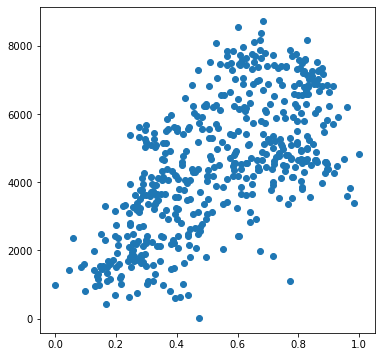

In [144]:
plt.figure(figsize=[6,6])
plt.scatter(data_train.temp, data_train.cnt)
plt.show()

Inferencess: 
. we pick temp as the first variable and we'll try to fit a regression line to that.

# divide the data into X train and Ytrain

In [145]:
#y is contain only target variable
y_train = data_train.pop("cnt")
#X is all remainign variable also our independent variables
X_train = data_train

In [146]:
#Inspect independent variables
X_train.head()

season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  \
653              0              0              1         0         0   
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         0         1   
482              0              1              0         0         0   

     mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  weekday_tue  \
653         0         0         0         0         0  ...            1   
576         0         0         1         0         0  ...            1   
426         0         0         0         0         1  ...            0   
728         0         0         0         0         0  ...            0   
482         0         0         0         0         0  ...            0   

     weekday_wed  weathersit_good  weathersit_moderate  yr  holiday  \
653            0                1                    0   1        0   
576            0                1                    0   1        0   
426            0                0                    1   1        0   
728            0                1                    0   1        0   
482            0                0                    1   1        0   

     workingday      temp       hum  windspeed  
653           1  0.509887  0.575354   0.300794  
576           1  0.815169  0.725633   0.264686  
426           0  0.442393  0.640189   0.255342  
728           0  0.245101  0.498067   0.663106  
482           0  0.395666  0.504508   0.188475  

[5 rows x 28 columns]

In [147]:
X_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

# perform linear regression

. Fit a regression line through the training dataset using statsmodels. 
. In statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step,
statsmodels fits a regression line passing through the origin, by default.

#### RFE is a Automated approach

In [148]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [149]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [150]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [151]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [152]:
# rfe not selected variables
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [153]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Manual Model Development using statsmodel

Function to build a model using statsmodel api

In [154]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [155]:
##### Function to calculate VIFs and print them

In [156]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1

In [157]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [158]:
# Check the parameters obtained
lr.params

const                   357.720359
season_Spring          -418.598099
season_Summer           336.594431
season_Winter           920.021411
mnth_aug                125.199371
mnth_dec               -396.232619
mnth_feb               -280.593454
mnth_jan               -545.654115
mnth_jul               -350.722818
mnth_jun                -25.835995
mnth_mar                  9.084485
mnth_may                208.086047
mnth_nov               -363.771604
mnth_oct                 65.481937
mnth_sept               704.572642
weekday_mon            -181.721302
weekday_sat             394.671620
weekday_sun             -79.351772
weekday_thu             -80.285776
weekday_tue            -164.190546
weekday_wed             -46.828209
weathersit_good        2237.692692
weathersit_moderate    1706.903551
yr                     2017.549844
holiday                -356.576398
workingday              398.976908
temp                   3916.282212
hum                   -1315.447663
windspeed           

In [159]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.74e-182
Time:                        07:14:11   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 357.7204    

Inferencess:
The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

In [160]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_mar', 1)

#### Model 2

In [161]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [162]:
# Print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.33e-183
Time:                        07:14:17   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     483   BIC:                             8364.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 362.3019    

In [163]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_jun', 1)

#### Model 3

In [164]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [165]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.84e-184
Time:                        07:14:27   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     484   BIC:                             8358.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 358.4575    

In [166]:
# We have high P value for mnth_October feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_oct', 1)

#### Model 4

In [167]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [168]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.40e-185
Time:                        07:14:31   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     485   BIC:                             8352.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 373.8300    

In [169]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_thu', 1)

#### Model 5

In [170]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [171]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.88e-186
Time:                        07:14:36   Log-Likelihood:                -4098.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     486   BIC:                             8346.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 352.9230    

In [172]:
# We have high P value for weekday_Sunday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_sun', 1)

#### Model 6

In [173]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [174]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.88e-186
Time:                        07:14:47   Log-Likelihood:                -4098.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     486   BIC:                             8346.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 291.3999    

In [175]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
21                  hum  28.56
20                 temp  28.35
15      weathersit_good  17.63
16  weathersit_moderate  10.13
0         season_Spring   9.29
1         season_Summer   7.21
19           workingday   7.10
2         season_Winter   7.01
22            windspeed   4.84
3              mnth_aug   3.32
7              mnth_jul   2.88
6              mnth_jan   2.53
10            mnth_sept   2.29
17                   yr   2.12
12          weekday_sat   2.04
5              mnth_feb   1.97
9              mnth_nov   1.95
4              mnth_dec   1.78
11          weekday_mon   1.68
14          weekday_wed   1.63
8              mnth_may   1.61
13          weekday_tue   1.52
18              holiday   1.39

inferencess:
. Hear am choosing the  variable  with high p-value and high VIF value
. The variable workingday has a significantly high VIF (7.56) and a high p-value (0.457) as well. Hence, this variable isn't  much use and it should be dropped.

In [176]:
# We have high P value for workingday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('workingday', 1)

#### Model 7

In [177]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [178]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.09e-183
Time:                        07:14:59   Log-Likelihood:                -4105.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     487   BIC:                             8355.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 684.5316    

In [179]:
# We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_sat', 1)

#### Model 8

In [180]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [181]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.01e-184
Time:                        07:15:04   Log-Likelihood:                -4107.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     488   BIC:                             8352.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 749.6736    

In [182]:
# We have high P value for mnth_August feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_aug', 1)

#### Model 9

In [183]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [184]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.69e-185
Time:                        07:15:09   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     489   BIC:                             8347.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 831.9168    

In [185]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_wed', 1)

#### Model 10

In [186]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [187]:
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.42e-186
Time:                        07:15:14   Log-Likelihood:                -4108.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     490   BIC:                             8341.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 856.6109    

In [188]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_may', 1)

#### Model 11

In [189]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [190]:
# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.56e-186
Time:                        07:15:18   Log-Likelihood:                -4109.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     491   BIC:                             8337.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 745.2574    

In [191]:
# We have high P value for mnth_Feb feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_feb', 1)

#### Model 12

In [192]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [193]:
# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.73e-187
Time:                        07:15:22   Log-Likelihood:                -4110.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     492   BIC:                             8334.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 655.7446    

In [194]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
15                  hum  26.51
14                 temp  25.16
10      weathersit_good  15.78
11  weathersit_moderate   9.28
0         season_Spring   5.76
16            windspeed   4.67
2         season_Winter   4.54
1         season_Summer   3.28
12                   yr   2.11
6              mnth_nov   1.90
4              mnth_jan   1.81
3              mnth_dec   1.62
5              mnth_jul   1.60
7             mnth_sept   1.43
8           weekday_mon   1.32
9           weekday_tue   1.19
13              holiday   1.15

In [195]:
# Check the parameters obtained
lr_11.params

const                   655.744645
season_Spring          -541.113020
season_Summer           354.100628
season_Winter           900.364519
mnth_dec               -328.408156
mnth_jan               -381.069471
mnth_jul               -479.722119
mnth_nov               -362.080056
mnth_sept               648.200293
weekday_mon             -64.917981
weekday_tue             -39.590789
weathersit_good        2162.756154
weathersit_moderate    1675.959795
yr                     2004.951193
holiday                -755.665677
temp                   4162.284574
hum                   -1381.883328
windspeed             -1637.377581
dtype: float64

### The model 12(lr_11) looks good because there are no features which is >0.05 and all the features VIF is less than 3.

###  Residual Analysis of the train data

In [196]:
y_train_pred = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

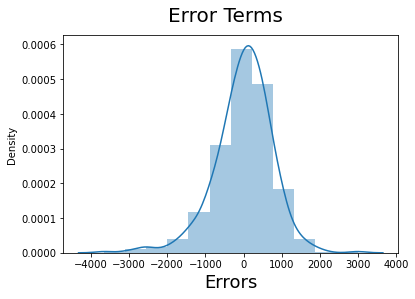

In [197]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Inferencess:
. By looking at the plot it shows clearlly the distplot is like normalality curve

#### Making Predictions Using the Final Model

In [198]:
num_columns=['temp','hum','windspeed']
data_test[num_columns] = scaler.transform(data_test[num_columns])

In [199]:
data_test.describe()

season_Spring  season_Summer  season_Winter    mnth_aug    mnth_dec  \
count     219.000000     219.000000     219.000000  219.000000  219.000000   
mean        0.255708       0.264840       0.232877    0.059361    0.086758   
std         0.437258       0.442259       0.423633    0.236840    0.282125   
min         0.000000       0.000000       0.000000    0.000000    0.000000   
25%         0.000000       0.000000       0.000000    0.000000    0.000000   
50%         0.000000       0.000000       0.000000    0.000000    0.000000   
75%         1.000000       1.000000       0.000000    0.000000    0.000000   
max         1.000000       1.000000       1.000000    1.000000    1.000000   

         mnth_feb    mnth_jan    mnth_jul    mnth_jun    mnth_mar  ...  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  ...   
mean     0.100457    0.077626    0.105023    0.095890    0.054795  ...   
std      0.301297    0.268194    0.307285    0.295115    0.228100  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       weekday_wed  weathersit_good  weathersit_moderate          yr  \
count   219.000000       219.000000           219.000000  219.000000   
mean      0.100457         0.652968             0.319635    0.479452   
std       0.301297         0.477117             0.467403    0.500722   
min       0.000000         0.000000             0.000000    0.000000   
25%       0.000000         0.000000             0.000000    0.000000   
50%       0.000000         1.000000             0.000000    0.000000   
75%       0.000000         1.000000             1.000000    1.000000   
max       1.000000         1.000000             1.000000    1.000000   

          holiday  workingday        temp         hum   windspeed          cnt  
count  219.000000  219.000000  219.000000  219.000000  219.000000   219.000000  
mean     0.036530    0.698630    0.558941    0.638508    0.313350  4546.981735  
std      0.188034    0.459904    0.233698    0.148974    0.159947  1898.633630  
min      0.000000    0.000000    0.046591    0.261915   -0.042808   441.000000  
25%      0.000000    0.000000    0.354650    0.527265    0.198517  3303.500000  
50%      0.000000    1.000000    0.558691    0.627737    0.299459  4579.000000  
75%      0.000000    1.000000    0.759096    0.743928    0.403048  5869.500000  
max      1.000000    1.000000    0.984424    1.002146    0.807474  8395.000000  

[8 rows x 29 columns]

### Dividing the data into X_test and y_test

In [200]:
y_test = data_test.pop('cnt')
X_test = data_test

In [201]:
X_test.shape

(219, 28)

In [202]:
y_test.shape

(219,)

In [203]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [204]:
X_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [205]:
X_test_m.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [206]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mnth_mar','mnth_jun','mnth_oct','weekday_thu','weekday_sun','workingday','weekday_sat',
             'mnth_aug','weekday_wed','mnth_may','mnth_feb']
X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [207]:
y_pred_m = lr_11.predict(X_test_m)

# Modeal evaluation:
. check the various assumptions
. check the R square  and adjusted R square
. Report the final model

# Validating the assumption of Linear Regression Model :
#####  check the various assumptions

. Linear Relationship
. Homoscedasticity
. Absence of Multicollinearity
. Independence of residuals
. Normality of Errors

# Linear Relationship

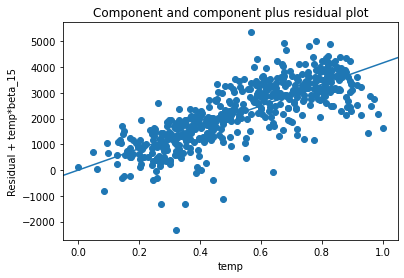

In [208]:
sm.graphics.plot_ccpr(lr_11, 'temp')
plt.show()

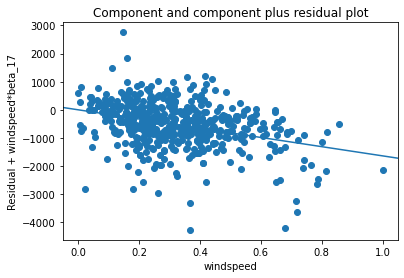

In [209]:
sm.graphics.plot_ccpr(lr_11, 'windspeed')
plt.show()

Inferencess:
. The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

# Homoscedasticity

Text(0, 0.5, 'y_pred')

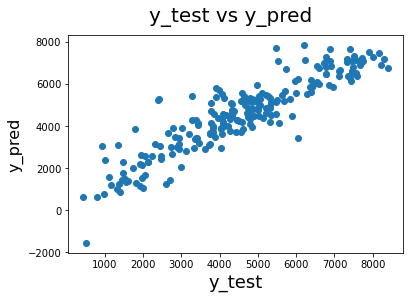

In [210]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Inferencess:
. There is no visible pattern in residual values.
. We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

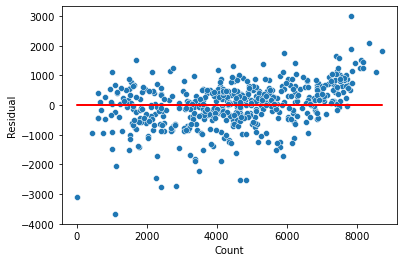

In [211]:
y_train_pred = lr_11.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Inference:
. There is no visible pattern in residual values, thus homoscedacity is well preserved

# Absence of Multicolinearity

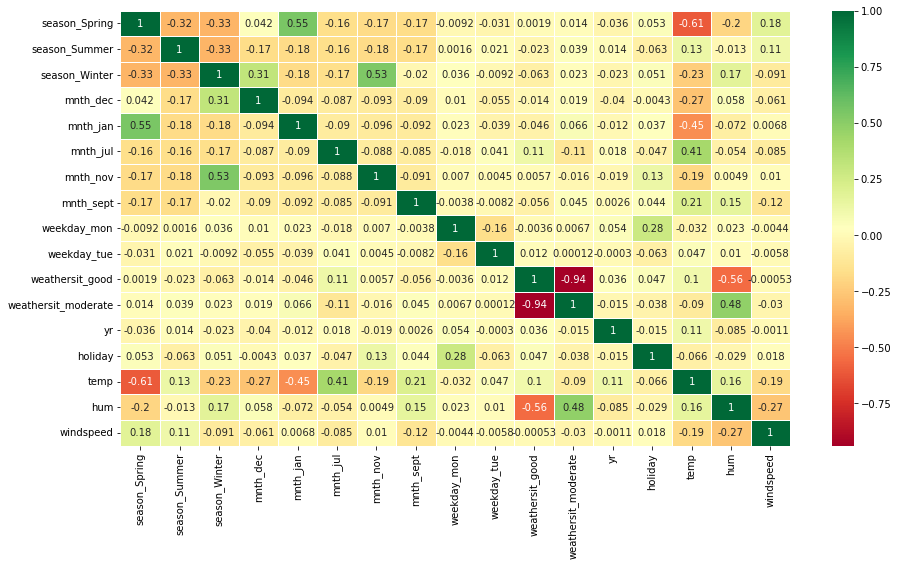

In [212]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

Inferencess:
. By observing the corelation matrix/heat map,we can notice some best points that are:
. The season_spring and mnth_jan are  positivelly high corelated with 0.55
. The season_winter and mnth_nov are positivelly corelated with 0.53

# Independence of residuals

Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

0 – 2: positive auto-correlation
2 – 4: negative auto-correlation

In [213]:
print('The Durbin-Watson value for Final Model lr_11 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr_11 is 2.0127


Inference:
. There is almost no autocorrelation.

# Normality of error

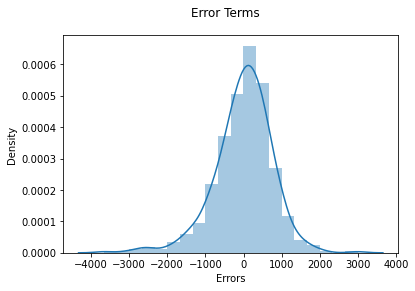

In [214]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

Inference:
. The bins are normally distributed

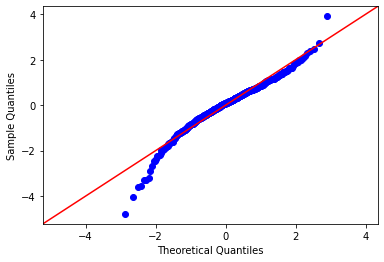

In [215]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Inference: 
. Based on the histogram, we can conclude that error terms are following a normal distribution

# Making Predictions using final model

In [216]:
num_vars = ['temp','hum', 'windspeed']
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  \
184              0              0              0         0         0   
535              0              1              0         0         0   
299              0              0              1         0         0   
221              0              0              0         1         0   
152              0              1              0         0         0   

     mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  ...  weekday_tue  \
184         0         0         1         0         0  ...            0   
535         0         0         0         1         0  ...            0   
299         0         0         0         0         0  ...            0   
221         0         0         0         0         0  ...            0   
152         0         0         0         1         0  ...            0   

     weekday_wed  weathersit_good  weathersit_moderate  yr  holiday  \
184            0                0                    1   0        1   
535            1                1                    0   1        0   
299            0                0                    1   0        0   
221            1                1                    0   0        0   
152            0                1                    0   0        0   

     workingday      temp       hum  windspeed  
184           0 -0.048400  0.006774  -0.088243  
535           1 -0.046286  0.006287  -0.086013  
299           1 -0.058120  0.008632  -0.080222  
221           1 -0.046886  0.004504  -0.080050  
152           1 -0.048842  0.003239  -0.073702  

[5 rows x 28 columns]

In [217]:
data_test.describe()

season_Spring  season_Summer  season_Winter    mnth_aug    mnth_dec  \
count     219.000000     219.000000     219.000000  219.000000  219.000000   
mean        0.255708       0.264840       0.232877    0.059361    0.086758   
std         0.437258       0.442259       0.423633    0.236840    0.282125   
min         0.000000       0.000000       0.000000    0.000000    0.000000   
25%         0.000000       0.000000       0.000000    0.000000    0.000000   
50%         0.000000       0.000000       0.000000    0.000000    0.000000   
75%         1.000000       1.000000       0.000000    0.000000    0.000000   
max         1.000000       1.000000       1.000000    1.000000    1.000000   

         mnth_feb    mnth_jan    mnth_jul    mnth_jun    mnth_mar  ...  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  ...   
mean     0.100457    0.077626    0.105023    0.095890    0.054795  ...   
std      0.301297    0.268194    0.307285    0.295115    0.228100  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       weekday_tue  weekday_wed  weathersit_good  weathersit_moderate  \
count   219.000000   219.000000       219.000000           219.000000   
mean      0.164384     0.100457         0.652968             0.319635   
std       0.371472     0.301297         0.477117             0.467403   
min       0.000000     0.000000         0.000000             0.000000   
25%       0.000000     0.000000         0.000000             0.000000   
50%       0.000000     0.000000         1.000000             0.000000   
75%       0.000000     0.000000         1.000000             1.000000   
max       1.000000     1.000000         1.000000             1.000000   

               yr     holiday  workingday        temp         hum   windspeed  
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  
mean     0.479452    0.036530    0.698630   -0.056692    0.006580   -0.080891  
std      0.500722    0.188034    0.459904    0.007102    0.001535    0.005132  
min      0.000000    0.000000    0.000000   -0.072263    0.002699   -0.092319  
25%      0.000000    0.000000    0.000000   -0.062901    0.005433   -0.084576  
50%      0.000000    0.000000    1.000000   -0.056700    0.006469   -0.081337  
75%      1.000000    0.000000    1.000000   -0.050609    0.007666   -0.078013  
max      1.000000    1.000000    1.000000   -0.043761    0.010327   -0.065037  

[8 rows x 28 columns]

In [218]:
#Selecting the variables that were part of final model.
col1=X_train.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_11 = sm.add_constant(X_test)

X_test_lm_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   season_Spring        219 non-null    uint8  
 2   season_Summer        219 non-null    uint8  
 3   season_Winter        219 non-null    uint8  
 4   mnth_dec             219 non-null    uint8  
 5   mnth_jan             219 non-null    uint8  
 6   mnth_jul             219 non-null    uint8  
 7   mnth_nov             219 non-null    uint8  
 8   mnth_sept            219 non-null    uint8  
 9   weekday_mon          219 non-null    uint8  
 10  weekday_tue          219 non-null    uint8  
 11  weathersit_good      219 non-null    uint8  
 12  weathersit_moderate  219 non-null    uint8  
 13  yr                   219 non-null    int64  
 14  holiday              219 non-null    int64  
 15  temp                 219 non-null    fl

In [219]:
X_test_lm_11.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [220]:
# Making predictions using the final model (lr_11)

y_pred = lr_11.predict(X_test_m)
y_pred

184    3447.220132
535    7834.402286
299    3658.184557
221    5328.054675
152    5259.938226
          ...     
400    3417.386193
702    6008.112709
127    4592.764395
640    7124.771583
72     2551.760079
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

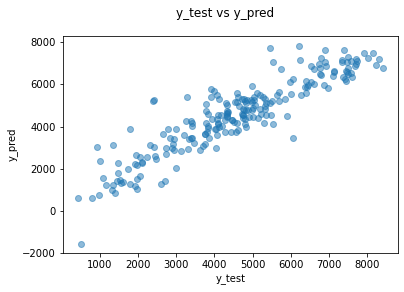

In [221]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

#### R2 Value Calculation for data_test dataframe

In [222]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8225

#### R2 Value Calculation for data_train dataframe

In [223]:
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))

Train R-Score:  0.8456417428289594


#### Adjusted R2 Value Calculation for data_test dataframe

In [224]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8075

#### Adjusted R2 Value Calculation for data_train dataframe

In [225]:
# n is number of rows in train dataset
n = X_train.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8164

Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.

#### Calculating RMSE for the selected Model

In [226]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

798.1445

#### Calculating Mean Absolute Error for the selected Model

In [227]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

595.3953

Inferencess: 
. The Root Mean Squared Error value for the test dataset based on final model is 791.9599 and Mean Absolute Error is 590.4833, which indicates that the model is good.
Note:
. The MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better.


#### Intrepretting the Model

#### Reporting the final model

Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [228]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed']
lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.73e-187
Time:                        07:16:31   Log-Likelihood:                -4110.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     492   BIC:                             8334.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 655.7446    

# Model Outcome Summary

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

# Analysing the above model, the comapany should focus on the following features:
. Company should focus on expanding business during Spring.
. Company should focus on expanding business during September.
. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to   2019.
. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

# Significant variables to predict the demand for shared bikes
. holiday
. temp
. hum
. windspeed
. Season(Spring,Summer,Winter)
. months(January, July, September, November, December)
. Year (2019)
. Monday and Tuesday
. weathersit(good,moderate)